# 머신러닝 - 분류와 군집

주제
- KNN(K-Nearest Neighbors)
- 유사도(Similarity)
- 군집
- K-Means

## 문제 1-1: KNN의 기본 원리
다음 상황을 고려해보세요.

2차원 평면에 
- 빨간 점 3개: (1,1), (2,2), (2,1)
- 파란 점 2개: (5,5), (6,6)
- *새로운 점 (3,3)을 분류하려고 합니다.

질문:

1. K=3일 때, 새로운 점은 어떤 색으로 분류될까요?
2. K=1일 때와 K=5일 때 결과는 어떻게 달라질까요?
3. K값을 짝수로 설정하면 어떤 문제가 발생할 수 있을까요?

## 문제 1-2: KNN의 특징
다음 중 KNN 알고리즘에 대한 설명으로 옳은 것을 모두 고르세요.

1. KNN은 학습 단계에서 모델을 생성합니다.
2. 데이터의 스케일이 결과에 영향을 줄 수 있습니다.
3. K값이 클수록 항상 정확도가 높아집니다.
4. 새로운 데이터를 예측할 때마다 모든 학습 데이터와의 거리를 계산합니다.

## 예제 실습 - KNN

1. scikit-learn의 KNeighborsClassifier를 사용하여 모델을 학습시키세요.
2. K=3으로 설정하여 테스트 데이터를 예측하세요.
3. K=1, 3, 5일 때 각각의 예측 결과를 비교하세요.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler # 스케일링

# 학습 데이터
X_train = [[1, 1], [2, 2], [3, 3], [6, 6], [7, 7], [8, 8]]
y_train = ['A', 'A', 'A', 'B', 'B', 'B']
# 테스트 데이터
X_test = [[4, 4], [5, 5]]

scaler = StandardScaler()# 스케일링 생성 
X_train_scaled = scaler.fit_transform(X_train) # fit과 transform을 동시에 
X_test_sacled = scaler.transform(X_test) # 훈련데이터의 기준으로 스케일링

# KNN 모델 생성 (K=3)
knn = KNeighborsClassifier(n_neighbors=3) #k=3으로 지정 

# 학습 수행
knn.fit(X_train_scaled, y_train)

# 예측 수행
pred = knn.predict(X_test_sacled)
print("예측 결과:", pred)

# 여러 K에 대해 시도
K_list = [1, 3, 5]

for k in K_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    
    pred = knn.predict(X_test_sacled)
    print(f"K={k} → 예측: {pred}")

예측 결과: ['A' 'B']
K=1 → 예측: ['A' 'B']
K=3 → 예측: ['A' 'B']
K=5 → 예측: ['A' 'B']


## Iris 데이터셋 분류하기

Iris 데이터셋을 사용하여 꽃의 품종(species)을 분류하는 KNN 모델을 만들어보세요.

1. `iris.csv` 파일을 읽고, 데이터 구조를 파악하세요.
2. 데이터를 훈련/테스트 데이터(8:2)로 분할하세요.
3. `species` 속성에 대해 라벨 인코딩(LabelEncoder 활용)을 수행하세요.
3. Feature Scaling(StandardScaler)을 적용하세요.
4. K=3부터 11까지 2씩 변경하면서(홀수) 최적의 K값을 찾으세요.
5. 최적 K값으로 모델을 학습시키고 다음을 출력하세요:
6. K값에 따른 테스트의 정확도 변화를 선 그래프로 시각화하세요.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
K 값별 Test 정확도 : [0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
최적의 K 값: 7
최적 K에서의 Test 정확도: 0.9667
최종 모델(

c:\Users\USER\miniconda3\envs\sesacjae\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesacjae\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesacjae\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesacjae\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\sesacjae\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO

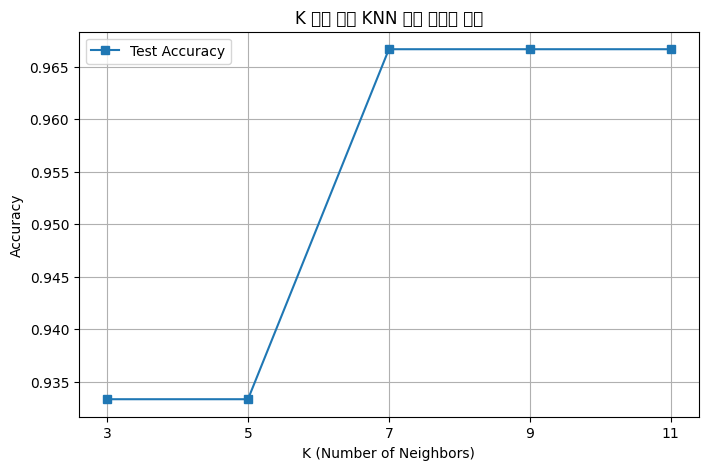

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. 데이터셋 읽고, 데이터 구조 파악하기
df = pd.read_csv('iris.csv')

print(df.head())
df.info()

# 2. 데이터 feature와 target으로 분리하기
X = df.drop('species', axis=1) # 특징(꽃받침/꽃잎 길이/너비)
y = df['species'] # 품종

# 3. 데이터셋 분할하기 (8:2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # 클래스 비율 유지
)

# 4. 훈련/테스트 target 변수에 대해 '라벨 인코딩' 수행
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train) # 훈련 데이터: 학습 + 적용
y_test_encoded = encoder.transform(y_test) # 테스트 데이터: 적용만

# 5. 훈련/테스트 feature에 대해 스케일링 수행(StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 훈련 데이터: 학습 + 적용
X_test_scaled = scaler.transform(X_test) # 테스트 데이터: 적용만

# 6. K = 3 ~ 11 에 대해 정확도 비교
k_list = range(3, 12, 2) # K=1, 3, 5, 7, 9, 11
test_accuracies = [] # 각 K마다의 정확도를 저장하는 리스트

for k in k_list: # 3, 5, 7, 9, 11
    # 각 K에 대한 KNN 모델 생성 후, 학습 진행
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train_encoded)
    
    # 테스트 데이터에 대해 예측 진행
    y_test_pred = model.predict(X_test_scaled)
    
    # 정확도 측정
    test_acc = accuracy_score(y_test_encoded, y_test_pred)
    test_accuracies.append(test_acc) # 기록하기

# 7. 최적 K값 찾기 (테스트 정확도가 가장 높은 K 선택)
best_k_index = test_accuracies.index(max(test_accuracies))
# 정확도 리스트에서 정확도가 max에 해당되는 인덱스 가져오는 코드
best_k = k_list[best_k_index] # 해당 인덱스에 대한 K 값을 가져온다

print("K 값별 Test 정확도 :", test_accuracies)
print(f"최적의 K 값: {best_k}")
print(f"최적 K에서의 Test 정확도: {test_accuracies[best_k_index]:.4f}")

# 8. 최적 K로 최종 KNN 모델로 학습하기
best_model = KNeighborsClassifier(n_neighbors=best_k)
# 위에서 구한 최적의 K로 KNN 모델 학습하기
best_model.fit(X_train_scaled, y_train_encoded)

# 9. 최종 테스트 예측 및 정확도
y_test_pred_final = best_model.predict(X_test_scaled)
final_test_acc = accuracy_score(y_test_encoded, y_test_pred_final) # 정확도 측정

print(f"최종 모델(최적 K={best_k}) Test 정확도: {final_test_acc:.4f}")

# 10. K 값에 따른 정확도 변화를 그래프로 시각화
plt.figure(figsize=(8, 5))
# 선 그래프로 K값이 변화할 때의 모델의 테스트 정확도 
# X축이 K값, Y축이 정확도
plt.plot(k_list, test_accuracies, marker='s', label='Test Accuracy')
plt.xticks(k_list)
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('K 값에 따른 KNN 모델 정확도 변화')
plt.legend()
plt.grid(True)

plt.show()

## 간단한 과일 분류

다음 과일 데이터를 사용하여 KNN 분류기를 만들어보세요.

요구사항:

1. KNeighborsClassifier를 사용하여 모델을 학습시키세요 (K=3)
2. 테스트 데이터를 예측하세요
3. 각 테스트 데이터의 예측 확률을 출력하세요
4. matplotlib으로 학습 데이터와 테스트 데이터를 산점도로 시각화하세요 (사과는 빨강, 오렌지는 주황)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 1. 학습 데이터 (무게, 지름)
X_train = [[150, 7], [170, 7.5], [140, 6.5], [130, 6],  
           [180, 8], [200, 9], [190, 8.5], [210, 9.5]]  
y_train = ['사과', '사과', '사과', '사과',
           '오렌지', '오렌지', '오렌지', '오렌지']

# 테스트 데이터
X_test = [[160, 7], [195, 9]]

# 2. K=3인 KNN 모델 생성 및 학습
model = None
None
# 3. 테스트 데이터 예측
y_pred = None

print("테스트 데이터:", X_test)
print("예측 결과:", None)

## 펭귄 종 분류

펭귄 데이터셋으로 펭귄의 종(species)을 분류해보세요.
요구사항:

1. 데이터셋을 읽고, 데이터의 구조를 파악하세요.
  - feature: `['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']`
  - target: `species`

2. 결측치가 있는 행을 제거하세요
3. species에 대해 인코딩을 수행하세요
3. 데이터를 train(70%)과 test(30%)로 분할하세요 (random_state=42)
4. StandardScaler로 스케일링하세요
5. K=1부터 15까지 2씩 변경하면서 최적의 K값을 찾으세요
6. 최적 K값으로 모델을 학습하고 다음을 출력하세요:
7. K값에 따른 정확도 변화를 선 그래프로 그리세요

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. penguins 데이터 로드
penguins = None

# 2. 사용할 특성(Features)과 타깃(Target) '이름' 지정
features = [None, None, None, None]
target = None

# 3. 결측치가 있는 행 제거하기
data = penguins[features + [target]].None
print(data.shape)

# 4. feature, target 분리
X = data[None]
y = data[None] # 문자열('Adelie', 'Chinstrap', 'Gentoo')

# 5. 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = None(
    None, None
    test_size=None,
    random_state=42,
    stratify=y
)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

# 6. 타겟 변수(species) 인코딩
label_encoder = None
y_train_encoded_ = label_encoder.None(None) # 학습 + 적용
y_test_encoded = label_encoder.None(None) # 적용만


# 7. StandardScaler로 스케일링
scaler = None
X_train_scaled = scaler.None(None) # 학습 + 적용
X_test_scaled = scaler.None(None) # 적용만

# 8. K = 1 ~ 15 까지 정확도 비교
k_values = range(1, 16, 2)
test_acc_list = []

for k in k_values:
    # KNN 모델 생성 및 학습하기
    model = None
    None
    
    # 예측 진행하기 
    y_test_pred = None
    
    # 테스트/예측 결과에 대한 정확도(accuracy_score) 평가
    test_acc = None
    test_acc_list.append(test_acc)
    
    print(f"K={k}: Train Acc = {train_acc:.4f} | Test Acc = {test_acc:.4f}")

# 9. 최적 K값 선택 (테스트 정확도가 가장 높은 K)
best_index = test_acc_list.index(max(test_acc_list))
best_k = list(k_values)[best_index]
best_test_acc = test_acc_list[best_index]

print(f"최적 K 값: {best_k}")
print(f"최적 K에서의 Test  Accuracy: {best_test_acc:.4f}")

# 10. 최적 K로 최종 모델 학습
best_model = None
None

# 11. 예측 예시 (앞 5개)
y_test_pred_best = best_model.None(X_test_scaled)
print("테스트셋 앞 5개 실제 라벨 (숫자):", y_test[:5])
print("테스트셋 앞 5개 예측 라벨 (숫자):", y_test_pred_best[:5])

# 12. K값에 따른 정확도 변화를 선 그래프로 시각화
plt.figure(figsize=(8, 5))
plt.plot(None, None, marker='s', label='Test Accuracy')

plt.xticks(k_values)
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K 값에 따른 KNN 정확도 변화 (펭귄 종 분류)")
plt.legend()
plt.grid(True)

plt.show()

## 당뇨병 발병 예측

Pima Indians Diabetes 데이터셋으로 당뇨병 발병(Outcome)을 예측해보세요.

요구사항:

0. 데이터셋을 읽어오세요.
1. 데이터를 탐색하고 기본 통계량을 출력하세요
2. train_test_split으로 데이터를 8:2로 분할하세요
3. 스케일링(StandardScaler)을 적용하세요
4. K=3, 5, 7, 9에 대해 모델을 학습시키고 비교하세요
5. 각 K값에 대한 정확도를 표(데이터프레임)로 정리하세요
6. 가장 좋은 정확도의 모델을 선택하고 그 때의 K와 정확도를 출력하세요.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 0. 데이터셋 읽어오기
df = None

# 1. 데이터 탐색 및 기본 통계량 출력


# 2. feature과 target 분리 ('Outcome' 컬럼이 타겟 변수)
X = None
y = None

# 3. 데이터셋 훈련/테스트 8:2 분할
X_train, X_test, y_train, y_test = None(
    X, y,
    test_size=None,
    random_state=42,
    stratify=y  # 클래스 비율 유지
)

print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

# 4. 스케일링 (StandardScaler)
scaler = None
X_train_scaled = scaler.None(None) # 학습 + 적용
X_test_scaled = scaler.None(None) # 적용만

# 5. K = 3, 5, 7, 9에 대해 모델 학습 및 정확도 비교
k_list = [3, 5, 7, 9]
results = []  # 결과를 저장할 리스트

for k in k_list:
    # 모델을 각 k에 대해 생성 후, 학습 진행
    model = None
    None
    
    # 예측 및 평가
    y_pred = None
    accuracy = None
    
    print(f"K = {k} 일 때 Test Accuracy: {accuracy:.4f}")
    # 각 결과 저장
    results.append({"K": k, "Test Accuracy": accuracy})

# 6. 저장한 결과를 표(DataFrame)로 정리 및 출력
results_df = pd.DataFrame(None)
print(results_df)

# 7. 위 표에서 가장 좋은 성능의 모델 선택
best_row = None # 가장 성능이 좋은 행(row) 추출하기
best_k = best_row['K']
best_acc = best_row['Test Accuracy']

print(f"\n가장 좋은 성능의 K: {best_k}")
print(f"해당 K에서의 Test Accuracy: {best_acc:.4f}")

# 예제 실습 - K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.DataFrame({
    'X': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51, 46],
    'y': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27, 8, 7]
})

# 모델 생성 및 학습


# 군집 시각화



# 예제 실습 - K 결정하기(Elbow Method)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "X": [
    2, 3, 2.5, 3.2, 4, 3.8, 2.9, 3.5, 4.1, 3.3,
    12, 13, 12.4, 14, 13.5, 15.2, 14.8, 13.1, 12.9, 15,
    3, 4, 2.7, 3.3, 4.5, 3.8, 3.1, 2.9, 4.2, 3.6,
    12.5, 13.8, 14.1, 15.3, 16, 14.7, 13.9, 15.8, 16.2, 14.4,
    7, 7.5, 6.8, 8, 7.2, 8.5, 7.7, 7.9, 8.3, 6.9
    ], 
    "y": [
    2, 2.5, 3, 3.2, 2.8, 3.5, 2.7, 3.1, 3.6, 2.9,
    3, 2.7, 3.2, 2.9, 3.5, 3.1, 2.8, 2.6, 3.3, 2.7,
    12, 11.8, 13, 12.2, 11.5, 12.8, 13.1, 11.7, 12.5, 12.9,
    13.5, 14, 14.2, 13.8, 15, 14.5, 13.9, 15.2, 14.8, 13.7,
    7, 7.3, 6.8, 7.5, 7.7, 8, 7.2, 8.1, 7.6, 7.4
]})

# Elbow Method

# Elbow 시각화하기
None
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid(True, alpha=0.3)
plt.show()

'''
Q. 최적의 K는?

'''

# 예제 실습 - K 결정하기(Silhouette Score)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "X": [
    2, 3, 2.5, 3.2, 4, 3.8, 2.9, 3.5, 4.1, 3.3,
    12, 13, 12.4, 14, 13.5, 15.2, 14.8, 13.1, 12.9, 15,
    3, 4, 2.7, 3.3, 4.5, 3.8, 3.1, 2.9, 4.2, 3.6,
    12.5, 13.8, 14.1, 15.3, 16, 14.7, 13.9, 15.8, 16.2, 14.4,
    7, 7.5, 6.8, 8, 7.2, 8.5, 7.7, 7.9, 8.3, 6.9
    ], 
    "y": [
    2, 2.5, 3, 3.2, 2.8, 3.5, 2.7, 3.1, 3.6, 2.9,
    3, 2.7, 3.2, 2.9, 3.5, 3.1, 2.8, 2.6, 3.3, 2.7,
    12, 11.8, 13, 12.2, 11.5, 12.8, 13.1, 11.7, 12.5, 12.9,
    13.5, 14, 14.2, 13.8, 15, 14.5, 13.9, 15.2, 14.8, 13.7,
    7, 7.3, 6.8, 7.5, 7.7, 8, 7.2, 8.1, 7.6, 7.4
]})

# 실루엣 점수를 저장하기 위한 리스트 정의

# 각 K마다의 실루엣 점수 출력(-1 ~ 1) 

# 실루엣 점수 시각화

# 최적의 K로 군집화하기
optimal_k = None
k_means = KMeans(n_clusters=None).fit(df)
centroids = k_means.cluster_centers_

print(centroids) # 2차원 형태 데이터: 각 데이터의 첫번째 값=X좌표, 두번째 값=Y좌표
print(k_means.labels_) # 각 데이터의 레이블(군집)

# 최적의 K로 군집화한 결과 시각화하기
plt.scatter(None, None, c=k_means.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## K-Means 알고리즘 적용하기

요구사항:

- 기본 수행
1. K=3으로 설정하여 군집화 수행
2. 산점도로 군집 결과 시각화 (각 군집을 다른 색으로 표시)
3. 각 군집의 중심점을 표시
- Elbow Method 수행
4. K를 1부터 10까지 변화시키며 inertia 계산
5. K에 따른 inertia를 선 그래프로 시각화 (Elbow Method)
6. 최적의 K 값을 제안하고 그 이유를 주석으로 작성
- Silhouette 수행
7. K를 2부터 6까지 변화시키며 실루엣 점수 계산
8. 각 K에 대한 실루엣 점수를 막대 그래프로 시각화
9. 가장 높은 실루엣 점수를 가진 K 값을 출력


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# [수정금지] 데이터 생성
np.random.seed(42)
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], 
              [9, 11], [8, 2], [10, 2], [9, 3], [2, 1]])

# 1. K=3으로 K-Means 학습/예측 수행하기
kmeans_3 = None(n_clusters=None, init='k-means++', random_state=42)
y_pred_3 = None # fit_predict 활용
centroids_3 = kmeans_3.cluster_centers_

# 2. 군집화 결과 시각화하기
plt.scatter(None, None, c=kmeans_3.labels_.astype(float), s=50, alpha=0.5) # 데이터 X에 대한 x축, y축 데이터 포인트 
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='red', s=50)
plt.show()

# 3. Elbow Method 수행하기
k_range = range(1, 11)
sse = []

for k in k_range:
    # 모델 생성 및 학습 진행
    kmeans = None(n_clusters=None, init='k-means++', random_state=42)
    None

    sse.append(None) # SSE(inertia) 저장

# 3-1. Elbow 시각화
# Elbow Method 시각화
plt.figure(figsize=(10, 6))
plt.plot(None, None, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('SSE', fontsize=12, fontweight='bold')
plt.title('Elbow Method', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

'''
Q. Elbow Method를 통해 최적의 K는? 그리고 이유는?
답:  
'''

# 4. Silhouette Score
k_range_silh = range(2, 7) # 2~6 범위
silhouette_scores = []

for k in k_range_silh:
    kmeans = KMeans(n_clusters=None, init='k-means++', random_state=42)
    None
    silhouette_scores.append(None) # 실루엣 점수 저장하기

# 5. 최적의 K 구하기
optimal_k = None

# 6. 최적의 K로 군집화 수행
kmeans_final = KMeans(n_clusters=None, init='k-means++', random_state=42)
cluster_labels = kmeans_final.None # 학습 및 예측 동시(fit_predict 활용)

# 7. 각 샘플의 실루엣 점수 출력
silhouette_avg = None # 최적의 K로 수행한 실루엣 점수 저장
sample_silhouette_values = silhouette_samples(X, cluster_labels)

print(f"전체 평균 Silhouette Score: {silhouette_avg:.4f}")

for idx, score in enumerate(sample_silhouette_values):
    print(f"  데이터 {idx} (Cluster {cluster_labels[idx]+1}): {score:.4f}")

## (실전) Mall Customer Segmentation 군집 분석

고객 세분화 데이터를 사용하여 고객 군집을 분석하시오.

* 데이터셋: `Mall_Customers.csv`

`CustomerID, Gender, Age, Annual Income, Spending Score` 포함

요구사항:

1. 데이터셋을 읽고, 데이터의 구조 등 간단한 EDA를 진행하세요.
2. 'Annual Income'과 'Spending Score' 두 feature만 사용하기 위해 컬럼을 추출합니다.
  - +추가로 추출된 데이터에 스케일링(StandardScaler)을 진행합니다.
3. Elbow Method와 Silhouette Score를 모두 사용하여 최적의 K를 결정합니다.
4. 최적의 K로 군집화를 수행합니다.
5. 산점도로 최적의 K로 수행한 군집 결과를 시각화합니다. (x축: Annual Income, y축: Spending Score)
6. 각 군집에 대한 아래 고객 군집 기준에 따른 비즈니스 인사이트 제공합니다. (예: "고소득-고지출 고객군")
  - 평균 소득이 60 초과: 고소득
  - 평균 소득이 40 미만: 저소득
  - 평균 지출이 60 초과: 고지출
  - 평균 지출이 40 미만: 저지출
7. 각 군집의 고객 수와 평균 특성을 요약 테이블로 출력합니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 데이터 구조 등 살펴보기(간단한 EDA 진행하기)
df = None

# 2. 데이터프레임에서 'Annual Income'과 'Spending Score' 두 feature만 사용하도록 추출
X = None

# 2-1. 스케일링 진행

# 3. Elbow Method와 실루엣 점수를 활용하여 최적의 K 찾기
sse = [] # SSE 저장 리스트
silhouette_scores = [] # 실루엣 점수 저장 리스트
k_range = range(2, 12) # 2부터 11까지

for k in k_range:
    k_means = None(n_clusters=None, init='k-means++', random_state=42)
    None # 학습 진행하기

    sse.append(None) # SSE 결과 저장
    silhouette_scores.append(None) # 실루엣 점수 저장

# 4. Elbow Method와 실루엣 점수 시각화하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 4-1. Elbow Method
ax1.plot(None, None, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 4-2. Silhouette Score
ax2.plot(None, None, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Elbow와 실루엣 점수를 통해 최적의 K 찾기
optimal_k = None
print(f'최적의 K: {optimal_k}')

# 6. 최적의 K로 군집화하기
k_means_final = KMeans(n_clusters=None, init='k-means++', random_state=42)

pred = k_means_final.fit_predict(None) # fit_predict: 학습과 동시에 라벨(군집)을 반환하는 역할
centroids = k_means_final.cluster_centers_ # 중심점 반환

# 7. 산점도로 군집화 그리기 (X축: Annual Income, Y축: Spending Score)
plt.scatter(None, None, c=k_means_final.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50) # 중심점
plt.show()

# 8. 각 군집에 대한 인사이트 제공
df['Cluster'] = None # 최종 학습/예측이 완료된 데이터에 대한 클러스터 정보 새 컬럼으로 새로 추가

for cluster_id in range(optimal_k):
    # 현재 cluster_id에 해당되는 데이터만 추출
    cluster_data = df[df['Cluster'] == None]
    
    # 추출된 데이터에서 Annual Income과 Spending Score의 평균 구하기
    avg_income = None
    avg_spending = None

    print(f"\nCluster {cluster_id + 1}:")
    print(f"  - 평균 연소득: ${avg_income:.1f}k")
    print(f"  - 평균 지출점수: {avg_spending:.1f}")

    # 고객 군집 구분에 따른 구체적인 인사이트(예시)
    if None:
        insight = "[VIP]: 고소득-고지출 → 프리미엄 제품 및 멤버십 프로그램 제공"
    elif None:
        insight = "[잠재고객]: 고소득-저지출 → 가치 제안 강화 및 맞춤형 프로모션 필요"
    elif None:
        insight = "[위험군]: 저소득-고지출 → 할부 상품 및 적립 프로그램 제공"
    elif None:
        insight = "[가격민감군]: 저소득-저지출 → 저가 상품 라인 및 할인 쿠폰 제공"
    else:
        insight = "[일반고객]: 중소득-중지출 → 균형잡힌 마케팅 전략 적용"
    
    print(insight) # 인사이트 출력

# 9. 요약 테이블 정리: 군집 별로 그룹화를 진행 후
# agg(): 각 컬럼을 어떤 집계함수로 요약할 것인지에 대한 함수
# agg() 인자의 딕셔너리 key:value 구조 = '컬럼 이름' : '집계 함수 이름'
summary = df.None(None).agg({
    'CustomerID' : 'count', # 고객의 수
    None : 'mean', # 소득의 평균
    None : None, # 지출의 평균
    None : None # 나이의 평균
}).round(2)

print(summary) # 출력